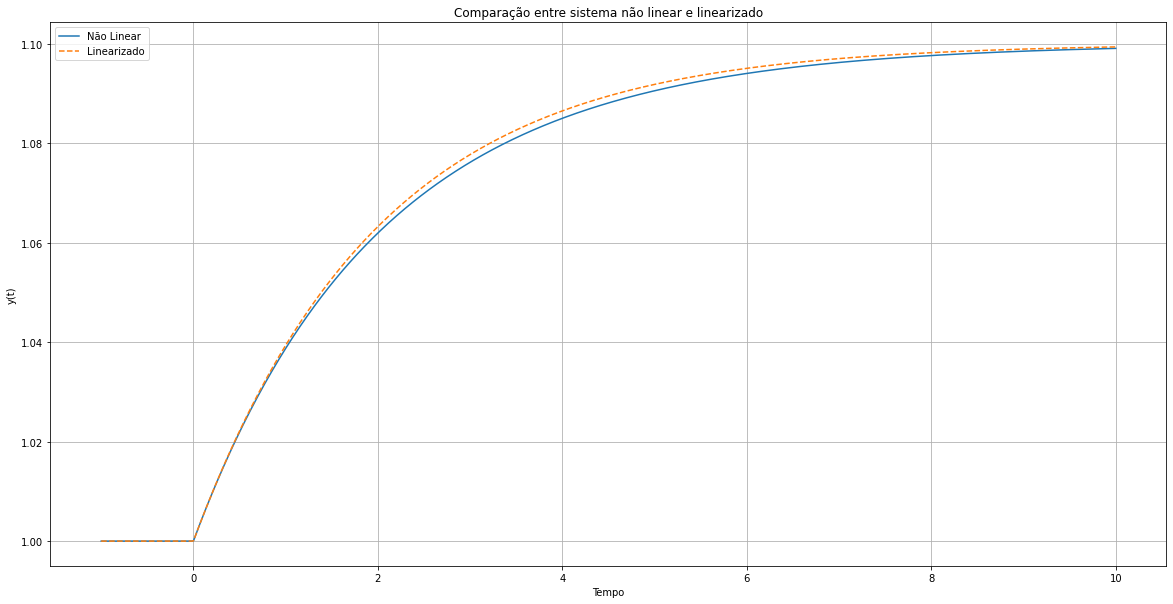

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parâmetros
k1 = 1.0
k2 = 1.0
u0 = 1
delta_u_value = 0.1

# Modelo Não Linear
def nonlinear_model(h, t):
    u = u0 if t < 0 else u0 + delta_u_value
    return -k2 * k1 * np.sqrt(h) + k2 * u

# Modelo Linearizado
def linear_model(delta_h, t):
    delta_u = 0 if t < 0 else delta_u_value
    return (-k2 * k1**2 / (2*u0) * delta_h + k2 * delta_u)

t = np.linspace(-1, 10, 1000)
h0 = (u0/k1)**2
delta_h0 = 0

# Simulações
h = odeint(nonlinear_model, h0, t)
delta_h = odeint(linear_model, delta_h0, t)

# Saídas
y_nonlinear = k1 * np.sqrt(h)
y_linear = k1 * np.sqrt(h0) + k1**2 / (2*u0) * delta_h

plt.figure(figsize=(20,10))
plt.plot(t, y_nonlinear, label="Não Linear")
plt.plot(t, y_linear, '--', label="Linearizado")
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("y(t)")
plt.title("Comparação entre sistema não linear e linearizado")
plt.grid(True)
plt.show()